<a href="https://colab.research.google.com/github/Chandanapentakota/Cognorise/blob/main/SMS_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset=pd.read_csv('spam.csv',encoding='latin-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
dataset['v1']=dataset['v1'].map({'ham':0,'spam':1})

In [ ]:
dataset.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
dataset.isnull()

,v1,v2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [ ]:
dataset.isna().sum()

v1    0
v2    0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='count'>

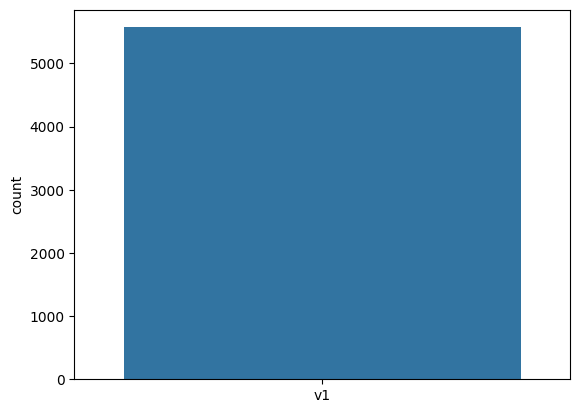

In [ ]:
sns.countplot(dataset)

In [ ]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [ ]:
courpus=[]

In [ ]:
dataset['v2'][1]

'Ok lar... Joking wif u oni...'

In [ ]:
for i in range(0,len(dataset)):
  text = re.sub(pattern='[^a-zA-Z]',repl = '  ', string=dataset['v2'][i])
  text = text.lower()
  words = text.split()
  cleaned_words = [word for word in words if word not in set(stopwords.words('english'))]
  ps = SnowballStemmer(language='english')
  words = [ps.stem(word) for word in cleaned_words]
  text = ' '.join(words)
  courpus.append(text)

In [ ]:
courpus[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(courpus).toarray()
y = dataset.iloc[:,0].values

In [ ]:
X.shape

(5572, 6216)

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape

(4457, 6216)

In [ ]:
x_test.shape

(1115, 6216)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha = 0.1)
classifier.fit(x_train,y_train)

MultinomialNB(alpha=0.1)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[938,  11],
       [  9, 157]])

<Axes: >

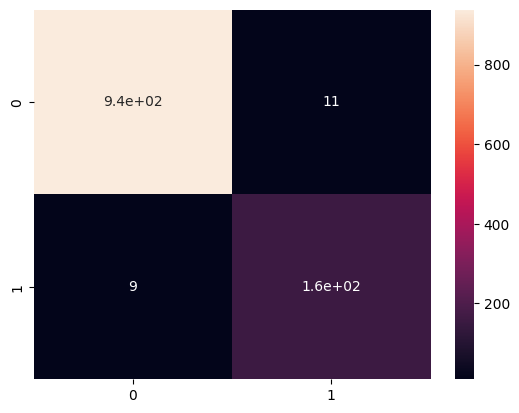

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy_score(y_test,y_pred)

0.9820627802690582

In [ ]:
precision_score(y_test,y_pred)

0.9345238095238095

In [ ]:
recall_score(y_test,y_pred)

0.9457831325301205

In [ ]:
chandu = 'Welcome to our website ,we will provide you free courses'

In [ ]:
chandu=np.array([chandu])

In [ ]:
chandu=cv.transform(chandu)

In [ ]:
classifier.predict(chandu)

array([1])